In [1]:
import numpy as np
import matplotlib.pyplot as plt
from OAM import OAMSorting as sort

In [15]:
lam = 1.97E-12; a = 10E-6; b = 50E-6
k = 2*np.pi/lam


flist = np.array([1,2,8])
modelist = []
modelist2 = []
modelist4 = []
for i in range(len(flist)):
    xmin = -10E-6; xmax = 10E-6; xres = 2000
    xres = 2*int(xres/2/flist[i])
    x = np.linspace(xmin,xmax,xres)
    dx = (xmax-xmin)/xres
    X,Y = np.meshgrid(x,x)
    R,T = np.sqrt(X**2+Y**2),np.arctan2(Y,X)
    u = lam*flist[i]*np.fft.fftshift(np.fft.fftfreq(xres,dx))
    du = (np.max(u)-np.min(u))/len(u)
    U,V = np.meshgrid(u,u)
    x2 = lam*flist[i]*np.fft.fftshift(np.fft.fftfreq(len(u),du))
    print(15*flist[i]/k/a/2E-6/np.sqrt(15/2))
    print(15*flist[i]/k/a)
    phic = -k*a*b/flist[i]*np.exp(-U/a)*np.cos(V/a)
    phiu = k*a/flist[i]*(R*T*np.sin(T)+R*np.cos(T)*(1-np.log(R/b)))
    mode = sort.LG(X,Y,l=15)
    mode1 = mode*np.exp(1j*phiu)
    mode2 = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(mode1)))
    mode3 = mode2*np.exp(1j*phic)
    mode4 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(mode3)))
    modelist.append(mode)
    modelist2.append(mode2)
    modelist4.append(mode4)

0.08586516118283385
4.703028568365507e-07
0.1717303223656677
9.406057136731014e-07
0.6869212894626708
3.7624228546924057e-06


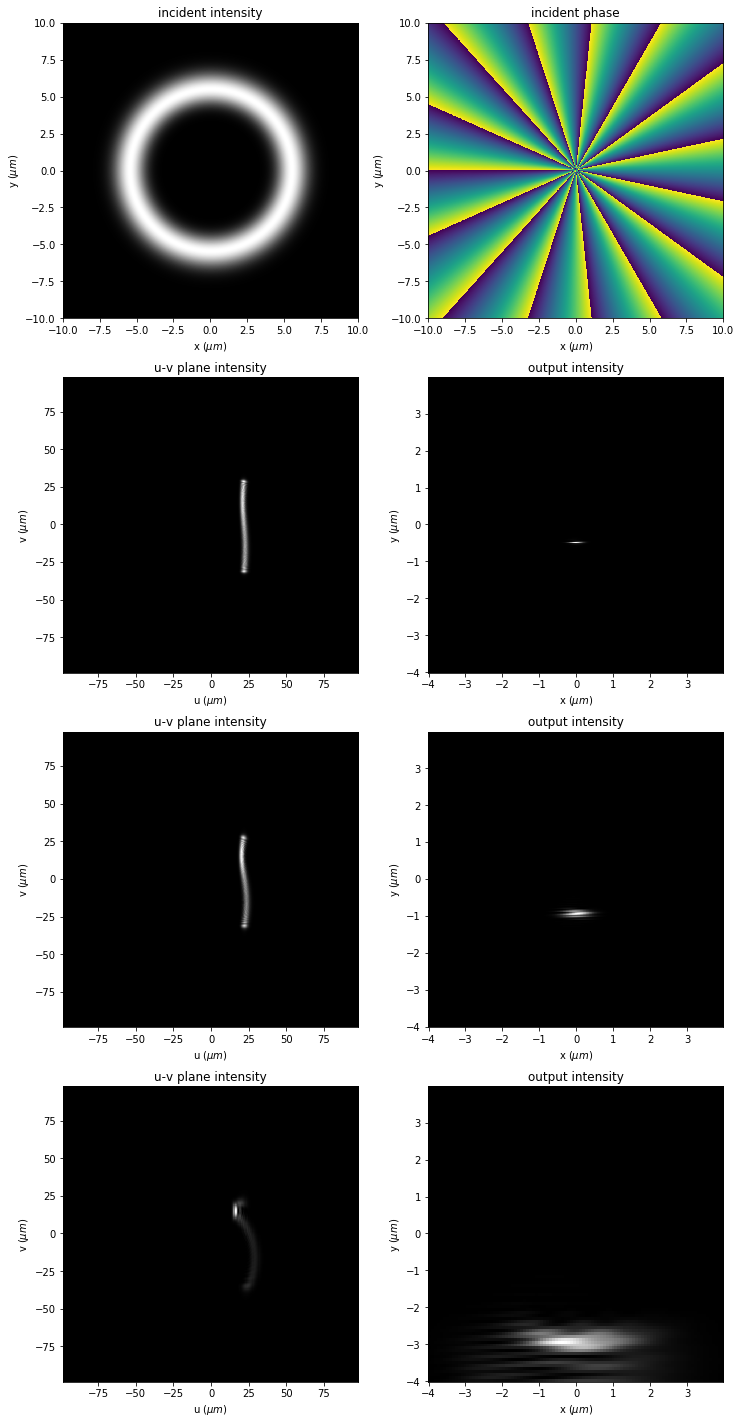

In [17]:
ext0 = 1E6*np.array([np.min(x),np.max(x),np.min(x),np.max(x)])
ext1 = 1E6*np.array([np.min(u),np.max(u),np.min(u),np.max(u)])
ext2 = 1/10*1E6*np.array([np.min(x2),np.max(x2),np.min(x2),np.max(x2)])

dum1 = int(len(modelist4[0])/10)
dum2 = int(len(modelist4[1])/10)
dum3 = int(len(modelist4[2])/10)

plt.figure(figsize=(12,25))
plt.subplot(421); plt.imshow(np.abs(modelist[0])**2,extent=ext0,cmap='binary_r')
plt.xlabel(r'x ($\mu m$)'); plt.ylabel(r'y ($\mu m$)'); plt.title("incident intensity")
plt.subplot(422); plt.imshow(np.angle(modelist[0]),extent=ext0)
plt.xlabel(r'x ($\mu m$)'); plt.ylabel(r'y ($\mu m$)'); plt.title("incident phase")
plt.subplot(423); plt.suptitle(""); plt.imshow(np.abs(modelist2[0])**2,extent=ext1,cmap='binary_r')
plt.xlabel(r'u ($\mu m$)'); plt.ylabel(r'v ($\mu m$)'); plt.title("u-v plane intensity")
plt.subplot(424); plt.imshow(np.abs(modelist4[0][3*dum1:7*dum1,3*dum1:7*dum1])**2,extent=4*ext2,cmap='binary_r')
plt.xlabel(r'x ($\mu m$)'); plt.ylabel(r'y ($\mu m$)'); plt.title("output intensity")
plt.subplot(425); plt.imshow(np.abs(modelist2[1])**2,extent=ext1,cmap='binary_r')
plt.xlabel(r'u ($\mu m$)'); plt.ylabel(r'v ($\mu m$)'); plt.title("u-v plane intensity")
plt.subplot(426); plt.imshow(np.abs(modelist4[1][3*dum2:7*dum2,3*dum2:7*dum2])**2,extent=4*ext2,cmap='binary_r')
plt.xlabel(r'x ($\mu m$)'); plt.ylabel(r'y ($\mu m$)'); plt.title("output intensity")
plt.subplot(427); plt.imshow(np.abs(modelist2[2])**2,extent=ext1,cmap='binary_r')
plt.xlabel(r'u ($\mu m$)'); plt.ylabel(r'v ($\mu m$)'); plt.title("u-v plane intensity")
plt.subplot(428); plt.imshow(np.abs(modelist4[2][3*dum3:7*dum3,3*dum3:7*dum3])**2,extent=4*ext2,cmap='binary_r')
plt.xlabel(r'x ($\mu m$)'); plt.ylabel(r'y ($\mu m$)'); plt.title("output intensity")
plt.savefig("DistortionFactorSeries.png")